### PROJECT TOPIC: MODEL PREDICTION ON STUDENTS ELIGIBILTY TO INTERMEDIATE CLASS
#### TABLE OF CONTENT
<ul>
    <li><a href='#introduction'> Introduction </a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#model">Data Modelling</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='introduction'></a>
#### INTRODUCTION 
>The project predict weather student is eligible to enroll for the intermediate class or not. Using some criterias. 
The data set provided, contains sixty observation and eight columns, which includes, S/N, Name, Email_Address, Lesson_Summary, Quize_Summary, Assignment_Summary, Grade_Point, and Intermediate Class Eligibility. The intermediate class Eligibility happens to be the target Variable.
From The Email Address and Quize summary has null in the entire observation. Althoug the data provided is minimal, so I downloaded a dummies data set of 500 rows to boost perfomance

#### AIMS AND OBJECTIVES
1. To predict if student is eligible for the intermediate class or not
2. To check the  model that best predict the terget variable
3. To check for the varible that best contributed to the achievement of the target variable

#### THE MACHINE LEARNING ALGORITHM USED
> The machine learning algorithm used is Supervised Classified machine learning with the target variable as intermediate class Eligibility


In [547]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')

<a id='wrangling'></a>
### Data Wrangling

In [548]:
# Read excel file
citron=pd.read_excel('citron_performance.xlsx')
data=pd.read_csv('dummies.csv')
citron.head()

,S/N,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
0,1,id_1,NaN,0/5,NaN,0,0.0,No
1,2,id_2,NaN,2023-05-05 00:00:00,NaN,70,56.0,Yes
2,3,id_3,NaN,2023-02-05 00:00:00,NaN,80,64.0,Yes
3,4,id_4,NaN,2023-05-05 00:00:00,NaN,100,80.0,Yes
4,5,id_5,NaN,2023-06-05 00:00:00,NaN,80,64.0,Yes


In [549]:
#check data types
citron.dtypes

S/N                                 int64
Name                               object
Email Address                     float64
Lesson Summary                     object
Quiz Summary                      float64
Assignment Summary                  int64
Grade Point Average               float64
Intermediate class Eligibility     object
dtype: object

In [550]:
citron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S/N                             60 non-null     int64  
 1   Name                            60 non-null     object 
 2   Email Address                   0 non-null      float64
 3   Lesson Summary                  60 non-null     object 
 4   Quiz Summary                    0 non-null      float64
 5   Assignment Summary              60 non-null     int64  
 6   Grade Point Average             60 non-null     float64
 7   Intermediate class Eligibility  60 non-null     object 
dtypes: float64(3), int64(2), object(3)
memory usage: 3.9+ KB


In [551]:
citron['Lesson Summary'].unique()# confirm the variable in the lesson summary column

array(['0/5', datetime.datetime(2023, 5, 5, 0, 0),
       datetime.datetime(2023, 2, 5, 0, 0),
       datetime.datetime(2023, 6, 5, 0, 0),
       datetime.datetime(2023, 4, 5, 0, 0),
       datetime.datetime(2023, 7, 5, 0, 0),
       datetime.datetime(2023, 3, 5, 0, 0)], dtype=object)

In [552]:
citron['Lesson Summary']=citron['Lesson Summary'].astype(str) # change datetime to string

In [553]:
# replace all date time string with appropriate value
replace_value={'2023-05-05 00:00:00':'5/5','2023-03-05 00:00:00':'3/5','2023-02-05 00:00:00':'2/5',
              '2023-04-05 00:00:00':'4/5','2023-06-05 00:00:00':'6/5','2023-07-05 00:00:00':'7/5'}
citron['Lesson Summary']=citron['Lesson Summary'].replace(replace_value, regex=True) 

In [554]:
citron['Lesson Summary'].unique()

array(['0/5', '5/5', '2/5', '6/5', '4/5', '7/5', '3/5'], dtype=object)

In [555]:
citron.head()

,S/N,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
0,1,id_1,NaN,0/5,NaN,0,0.0,No
1,2,id_2,NaN,5/5,NaN,70,56.0,Yes
2,3,id_3,NaN,2/5,NaN,80,64.0,Yes
3,4,id_4,NaN,5/5,NaN,100,80.0,Yes
4,5,id_5,NaN,6/5,NaN,80,64.0,Yes


In [556]:
citron.columns=citron.columns.str.replace(' ','_') # replace ' ' within the column name by '_'

In [557]:
citron.columns

Index(['S/N', 'Name', 'Email_Address', 'Lesson_Summary', 'Quiz_Summary',
       'Assignment_Summary', 'Grade_Point_Average',
       'Intermediate_class_Eligibility'],
      dtype='object')

In [558]:
citron.Assignment_Summary.unique()

array([  0,  70,  80, 100,  90,  98], dtype=int64)

In [559]:
data.head()# Dummies File

,S/N,Lesson_Summary,Assignment_Summary,Grade_Point_Average,Status
0,61,4,51,58,True
1,62,4,32,6,True
2,63,2,54,15,True
3,64,7,4,29,False
4,65,1,49,14,True


In [560]:
data['Intermediate_class_Eligibility']=np.where((data['Assignment_Summary']>=50) & (data['Grade_Point_Average'] >=50), 
                                                'Yes','No')
data.drop(columns=['Status'], axis=1, inplace=True)
data.head()

,S/N,Lesson_Summary,Assignment_Summary,Grade_Point_Average,Intermediate_class_Eligibility
0,61,4,51,58,Yes
1,62,4,32,6,No
2,63,2,54,15,No
3,64,7,4,29,No
4,65,1,49,14,No


In [561]:
data['Grade_Point_Average']=data['Grade_Point_Average'].astype(float)

In [562]:
data['Lesson_Summary']=data['Lesson_Summary']/5

In [563]:
# drop Email_address column and Quize_Summary column
citron.drop(columns=['Email_Address','Quiz_Summary','Name'], axis=1, inplace=True)

In [564]:
#citron.to_csv('inter_track.csv', index=False)

In [565]:
# DEALING WITH / IN THE LESSON SUMMARY
citron['Lesson_Summary_D']=citron['Lesson_Summary'].apply(lambda x: x.split('/')[1]).astype(int)
citron['Lesson_Summary']=citron['Lesson_Summary'].apply(lambda x: x.split('/')[0]).astype(int)


In [566]:
citron['Lesson_Summary']=citron['Lesson_Summary']/citron['Lesson_Summary_D']
citron.drop(columns=['Lesson_Summary_D'], axis=1, inplace=True)

In [567]:
citron_data=pd.concat([citron,data], ignore_index=True)
citron_data.shape

(560, 5)

In [568]:
citron_data.Intermediate_class_Eligibility.value_counts()

No     400
Yes    160
Name: Intermediate_class_Eligibility, dtype: int64

In [569]:
citron_data.to_csv('combine_interp.csv', index=False)

In [570]:
citron_data['Intermediate_class_Eligibility']=citron_data['Intermediate_class_Eligibility'].map({'Yes':1,'No':0})

<a id='eda'></a>
### Exploratory Data Analysis (EDA)

In [571]:
citron_data.describe()

,S/N,Lesson_Summary,Assignment_Summary,Grade_Point_Average,Intermediate_class_Eligibility
count,560.000000,560.000000,560.00000,560.000000,560.000000
mean,280.500000,0.717143,51.95000,49.500357,0.285714
std,161.802349,0.467925,31.99068,29.768904,0.452158
min,1.000000,0.000000,0.00000,0.000000,0.000000
25%,140.750000,0.200000,23.00000,23.000000,0.000000
50%,280.500000,0.800000,53.00000,52.000000,0.000000
75%,420.250000,1.200000,80.00000,77.000000,1.000000
max,560.000000,1.400000,100.00000,100.000000,1.000000


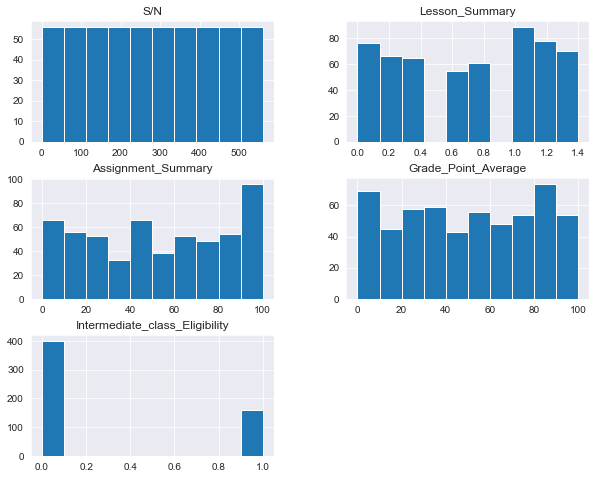

In [572]:
citron_data.hist(figsize=(10,8));

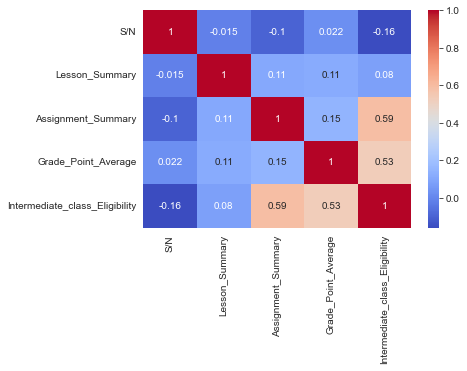

In [573]:
sb.heatmap(citron_data.corr(), cmap='coolwarm', annot=True);

In [574]:
corr_col=citron_data.corr()['Intermediate_class_Eligibility'].sort_values(ascending=False)
corr_col

Intermediate_class_Eligibility    1.000000
Assignment_Summary                0.588807
Grade_Point_Average               0.525385
Lesson_Summary                    0.079962
S/N                              -0.159207
Name: Intermediate_class_Eligibility, dtype: float64

In [575]:
skewed=citron_data.skew().sort_values(ascending=False)
skewed

Intermediate_class_Eligibility    0.951233
S/N                               0.000000
Assignment_Summary               -0.050266
Grade_Point_Average              -0.072919
Lesson_Summary                   -0.108669
dtype: float64

#### Summary EDA
-----------------
1. m the exploratory data Analysis, The Assignment summary and Grade poin Average columns are correllated with the target variable with correllation value of 0.59 and 0.53 respectively.
2. The EDA also indicated that the data provided has no skewness
3. The Data is normarlly distributed that contributed to the absent of outliers in the variable provided

#### DATA PREPROCESSING:

In [576]:
target= citron_data['Intermediate_class_Eligibility']
citron_p=citron_data.drop(columns=['Intermediate_class_Eligibility'], axis=1)

In [577]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
transform_df=pd.DataFrame(scaler.fit_transform(citron_p), columns=citron_p.columns)

In [578]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test=train_test_split(citron_p, target, random_state=0, shuffle=True, test_size=.2)

In [579]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((448, 4), (112, 4), (448,), (112,))

<a id='model'></a>
### Data Modelling

In [580]:
# IMPORT ALL REQUIRED MODEL FOR PREDICTION PASS IS INTO DICTIONARY
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
# import metric library
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [581]:
# CREATE A DICTIONARY THAT CONTAIN ALL THE MODEL NEEDED
model={'logistic_reg':LogisticRegression(),
      'decision_tree':DecisionTreeClassifier(),
      'random_classifier': RandomForestClassifier(),
      'xgb':XGBClassifier(),
      'svc': SVC()}

In [582]:
def check_model(models, x_train,x_test,y_train,y_test):
    """
    model=dictionay
    x_train:Training data without label,
    x_test:Testing data without label
    y_train: training data with label
    y_test: testing data with label
    """
    
    model_scores=[]
    test_scores=[]
    names=[]
    
    for name, model in models.items():
        model.fit(x_train,y_train)
        predict_train=model.predict(x_train)
        model_score=accuracy_score(predict_train,y_train)
        model_scores.append(model_score)
        predict_test=model.predict(x_test)
        test_score=accuracy_score(predict_test,y_test)
        test_scores.append(test_score)
        names.append(name)
        df= pd.DataFrame({'Name':names,'Train_score':model_scores,
                          'Test_score':test_scores})
    return df

In [583]:
check_model(models=model, 
            x_train=X_train,
            x_test=X_test,
            y_train=Y_train,
            y_test=Y_test) 

,Name,Train_score,Test_score
0,logistic_reg,0.941964,0.937500
1,decision_tree,1.000000,1.000000
2,random_classifier,1.000000,1.000000
3,xgb,1.000000,1.000000
4,svc,0.912946,0.919643


It is clearly shows that Logistic regression work best in the modeling of both the train and test data with 94.2% and 93.8% respectively

In [585]:
log_m=LogisticRegression()
log_m.fit(X_train,Y_train)
model_pred=log_m.predict(X_train)

In [588]:
print('The accuracy score of the train data is {}%'. format(round(accuracy_score(model_pred,Y_train),2)*100))

The accuracy score of the train data is 94.0%


In [504]:
test_pred=log_m.predict(X_test)
print('The accuracy score of the test data is {}%'. format(round(accuracy_score(test_pred,Y_test),3)*100))

The accuracy score of the test data is 93.8%


In [505]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, recall_score, confusion_matrix

In [506]:
cross_val_score(log_m, X_train,Y_train, cv=3, scoring='accuracy')

array([0.94666667, 0.91275168, 0.95302013])

In [507]:
predict_scor=cross_val_predict(log_m, X_test,Y_test,cv=3)

In [508]:
#check for precision score of the pred_score
precision_score(predict_scor,Y_test)

0.8214285714285714

In [509]:
recall_score(predict_scor, Y_test)

0.8518518518518519

In [510]:
f1_score(predict_scor,Y_test)

0.8363636363636364

In [511]:
confusion_matrix(predict_scor, Y_test)

array([[80,  5],
       [ 4, 23]], dtype=int64)

The confusion matrix here shows that tendencies of student to be eligible for the intermediate class is higher Once the requirement is met. This include TP- 80, FP-5 FN-4 and TN- 23 

#### Columns that serve as best features to the outcome of the model

In [512]:
from sklearn.inspection import permutation_importance
m= permutation_importance(log_m, X_test,Y_test, 
                                            n_repeats=30, random_state=0)
for x in m.importances_mean.argsort()[::-1]:
    if m.importances_mean[x] - 2 * m.importances_std[x] > 0:
        print(f"{citron_data.columns[x]:<8}"
              f" {m.importances_mean[x]:.3f}"
              f" +/- {m.importances_std[x]:.3f}")

Grade_Point_Average 0.221 +/- 0.034
Assignment_Summary 0.197 +/- 0.024
S/N      0.015 +/- 0.006


From the above observation, it is discovered that Grade point Average contributed more to the performance of our model, which has earlier been noted in the correlation heatmap with 0.59 correlation value, The permutation_importance has really authenticate the fact and make the prove more significant.

#### Perform HyperParameter Tunning

In [513]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [514]:
parameter={'penalty':['l2'],
          'C': np.logspace(1,3,7)
          ,'solver':['lbfgs','newton-cg','liblinear'],
          'max_iter':[100]}

In [515]:
grid_model=GridSearchCV(log_m, param_grid=parameter,scoring='accuracy',cv=3)

In [516]:
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([  10.        ,   21.5443469 ,   46.41588834,  100.        ,
        215.443469  ,  464.15888336, 1000.        ]),
                         'max_iter': [100], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             scoring='accuracy')

In [517]:
final_model=grid_model.best_estimator_
cross_val_score(final_model,X_test,Y_test,scoring='accuracy')

array([0.86956522, 0.91304348, 1.        , 0.90909091, 0.95454545])

In [518]:
pred=cross_val_predict(final_model,X_test,Y_test)

In [519]:
confusion_matrix(pred,Y_test)

array([[81,  5],
       [ 3, 23]], dtype=int64)

In [520]:
print('Tunned Hyperparameter:', grid_model.best_params_)
print('Accuracy:', grid_model.best_score_)

Tunned Hyperparameter: {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.9374794929157346


In [521]:
log=LogisticRegression(C=10.0,penalty='l2',solver='lbfgs')
log.fit(X_train,Y_train)
y_pred=log.predict(X_test)
print('accuracy score after tunning:', accuracy_score(y_pred,Y_test))

accuracy score after tunning: 0.9375


With Hyperparrameter Tunning the model performance make no changes to its output

<a id='conclusions'></a>
### Conclusion

1. The best model used for the prediction LogisticRegression  with train accuracy of 94% and test accuracy of 93.8%
2. The confussion matrix of the model indicated it perfection looking at the top right i.e type 1 error of 5 and type 2 error of 4
3. The best parameter that contributed to the success of the model is Grade point Average and assignment summary with correllation value of 0.59 and 0.53 respectively
4. The model did not posses any change even after hyperparameter Tunning

#### LIMITATION
> Few dataset provided which initially indering the performance of the model, More data added to improve the model performance